# Problem: Predicting Housing Prices Using Linear Regression

In this notebook, we'll apply gradient descent to solve a simple linear regression problem: predicting housing prices based on the size of a house. By gradually adjusting the model's parameters (slope and intercept), we’ll minimize the error between the predicted and actual prices, making this a real-world example of optimization in action.

## 1. Problem Setup

We’ll use a simple, simulated dataset with `size` as the independent variable and `price` as the target variable. The goal is to find a line that best fits the data, using gradient descent to minimize the **Mean Squared Error (MSE)** between our predictions and the actual prices.

The linear relationship we’re trying to model is:

$\text{price} = w \times \text{size} + b$

where:
- $w$ is the slope (how much price increases per square meter),
- $b$ is the intercept (base price when the size is zero).

## 2. Cost Function: Mean Squared Error (MSE)

To measure how well our model fits the data, we’ll use the Mean Squared Error (MSE):
$\text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( y_i - (\hat{w} x_i + \hat{b}) \right)^2$
where:
- $y_i$ is the actual price,
- $x_i$ is the size,
- $\hat{w}$ and  $\hat{b}$ are the model parameters (slope and intercept).

Our goal is to minimize the MSE by adjusting $w$ and $b$ over a series of iterations.

## 3. Gradient Descent Algorithm

**Gradient descent** is an optimization algorithm that iteratively adjusts the parameters to minimize the cost function (MSE, in this case). At each step, we compute the **gradient** of the MSE with respect to $\hat{w}$ and $\hat{b}$, then update these parameters in the opposite direction of the gradient to reduce the error.

The update rules are:
$w_{\text{new}} = w_{\text{old}} - \alpha \cdot \frac{\partial \text{MSE}}{\partial w}$

$b_{\text{new}} = b_{\text{old}} - \alpha \cdot \frac{\partial \text{MSE}}{\partial b}$

where:
- $\alpha$ is the **learning rate**—a small positive number that controls the size of the update steps.

In each iteration, we:
1. Predict the prices using the current values of $w$ and $b$.
2. Calculate the MSE based on these predictions.
3. Update $w$ and $b$ using the gradients to reduce the MSE.

## 4. Visualization of the Optimization Process

To help visualize the optimization, we’ll plot the regression line at selected iterations (every 5th iteration), so we can see how the line moves closer to the actual data as gradient descent progresses. Additionally, we'll plot the MSE over each iteration to show how the error decreases over time.

## 5. Code Implementation

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset (e.g., house size vs. price)
np.random.seed(0)
size = np.random.rand(100) * 100  # Size of the house in square meters
true_w, true_b = 5, 10  # Assume true relationship: price = 5 * size + 10
price = true_w * size + true_b + np.random.randn(100) * 10  # Adding some noise

In [106]:
w, b = 0, 0  # Initial guesses for slope and intercept

# Store the values for plotting
w_values, b_values = [w], [b]
mse_values = []

In [188]:
predictions = w * size + b
# Calculate Mean Squared Error
mse = np.mean((price - predictions) ** 2)
mse_values.append(mse)

# Derivatives
w_grad = -2 * np.mean(size * (price - predictions))
b_grad = -2 * np.mean(price - predictions)

# Update parameters
w -= alpha * w_grad
b -= alpha * b_grad

print("w = ",w, "MSE = ", mse)

w =  5.1806295445731125 MSE =  139.1316682472418


In [ ]:
# Gradient Descent Parameters
alpha = 0.00002  # Learning rate
iterations = 100  # Number of iterations
w, b = 0, 0  # Initial guesses for slope and intercept

# Store the values for plotting
w_values, b_values = [w], [b]
mse_values = []

In [96]:
# Store the values for plotting
w_values, b_values = [w], [b]
mse_values = []

# Gradient Descent Loop
for _ in range(iterations):
    # Predicted prices with current w, b
    predictions = w * size + b
    # Calculate Mean Squared Error
    mse = np.mean((price - predictions) ** 2)
    mse_values.append(mse)
    
    # Derivatives
    w_grad = -2 * np.mean(size * (price - predictions))
    b_grad = -2 * np.mean(price - predictions)
    
    # Update parameters
    w -= alpha * w_grad
    b -= alpha * b_grad
    
    # Store parameters for visualization
    w_values.append(w)
    b_values.append(b)

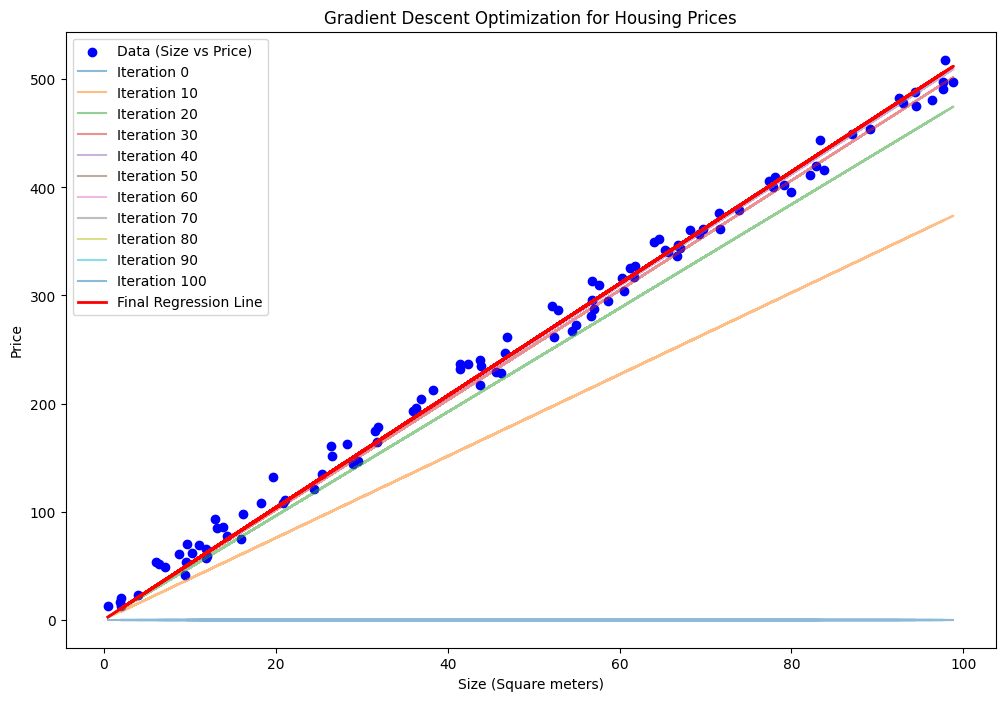

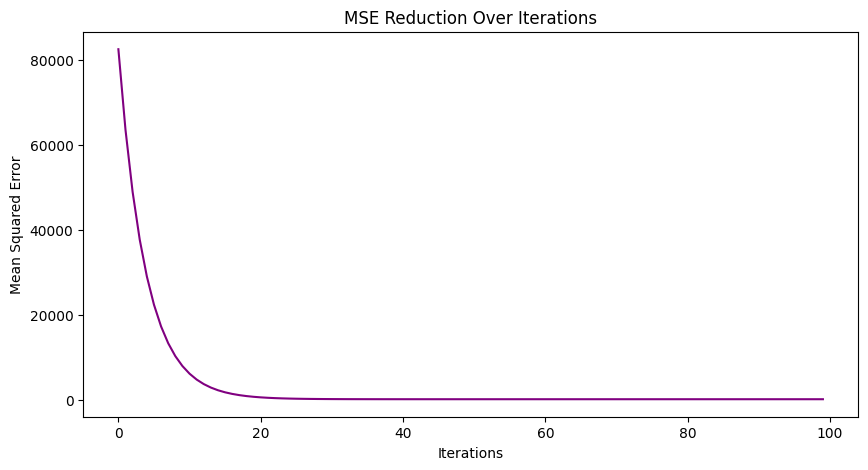

In [98]:
# Visualization of the optimization process
plt.figure(figsize=(12, 8))

# Plot the dataset
plt.scatter(size, price, color='blue', label='Data (Size vs Price)')

# Plot the regression line for each iteration
for i in range(0, len(w_values), 10):  # Plot every 10th iteration
    plt.plot(size, w_values[i] * size + b_values[i], 
             label=f"Iteration {i}", alpha=0.5)

# Final regression line
plt.plot(size, w * size + b, color='red', label='Final Regression Line', linewidth=2)
plt.xlabel("Size (Square meters)")
plt.ylabel("Price")
plt.title("Gradient Descent Optimization for Housing Prices")
plt.legend()
plt.show()

# Plot MSE over iterations
plt.figure(figsize=(10, 5))
plt.plot(mse_values, color='purple')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("MSE Reduction Over Iterations")
plt.show()